<font color=blue>TITLE:</font> Predict Total Number of Bikes Rented in a Given Hour

<font color=blue>DESCRIPTION:</font>

The purpose of this analysis is to answer the question-

*"How many bikes can we expect to be rented every hour, given the temperature, weather, wind, and other factors?"*

The analysis steps are:
1. Download the data
2. Perform Exploratory Data Analysis on bike rentals
3. Split data in training and testing sets
4. Model using Linear Regression
5. Model using a Decision Tree Classification
6. Model using a Random Forest Classification
7. Draw Conclusion(s)


In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, roc_auc_score
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("hour.csv", parse_dates = ["dteday"])

In [11]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [12]:
df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


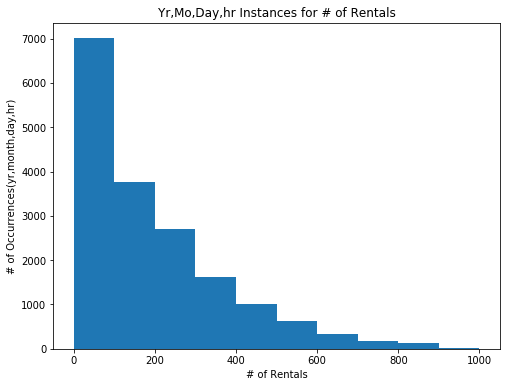

In [13]:
#plot the number of rentals in a day
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.hist(df['cnt'], bins = 10, range = (0,1000))
ax.set_title('Yr,Mo,Day,hr Instances for # of Rentals')
ax.set_xlabel("# of Rentals")
ax.set_ylabel("# of Occurrences(yr,month,day,hr)")
plt.show()

Most hours there are <= 100 rentals
<br><br><br>

In [14]:
#Evalute which variables correlate strongly with cnt, the number of rentals
df.corr(method = 'pearson')

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


`cnt` correlates most strongly with `hr`, `temp` and `hum`.  It also correlates with `casual` and strongly correlates with `registered`. I don't think, however, that `casual` or `registered` status helps the bike rental owner know how the # of rentals will vary within a day or across days.  Knowing what the temperature and humidity will be from weather reports, and the number of rentals by hour can help the owner adjust worker schedules, hours of opening, and rental prices.  I'm going to focus on these 3 variables.
<br><br><br>

In [15]:
#function to group the hours in df per the instructions from Dataquest.  I think a more useful grouping would be
# 6am - 9am: Rush hour
# 9am - 11am: leisure morning
# 11am - 2pm: Lunch hour
# 2pm - 4pm: Leisure afternoon
# 4pm - 7pm: Rush hour
# 7pm - 9pm: Leisure evening,
#but I will go ahead a use the Dataquest groupings.

def add_labels(hr):
    if hr > 6 and hr <= 12:
        return 1
    elif hr > 12 and hr <= 18:
        return 2
    elif hr > 18 and hr <= 24:
        return 3
    elif hr >= 0 and hr <= 6:
        return 4

df["time_labels"] = df["hr"].apply(add_labels)

In [16]:
#create training and testing datasets
train = df.sample(frac = .8)
test = df.loc[~df.index.isin(train.index)]

In [17]:
# check the train dataset
train.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_labels
13712,13713,2012-07-30,3,1,7,13,0,1,1,1,0.80,0.7424,0.49,0.1642,57,169,226,2
10451,10452,2012-03-16,1,1,3,14,0,5,1,2,0.48,0.4697,0.72,0.0000,56,146,202,2
3784,3785,2011-06-11,2,0,6,14,0,6,0,1,0.82,0.7727,0.49,0.1045,148,232,380,2


In [18]:
#Linear Regression model: calculate rmse for predictions with time_labels, temperature and humidity
#The temp and hum factors are scaled between 0 and 1, time_labels has 4 integer values: 1,2,3,4

columns = ["time_labels", "temp", "hum"]
lr = LinearRegression()
lr.fit(train[columns],train["cnt"])  #fit the training data
lr_predictions = lr.predict(test[columns]) #predict test cnt using fit model
lr_mse = mean_squared_error(test["cnt"], lr_predictions)
lr_rmse = lr_mse **.5


In [19]:
print("cnt mean: {:.0f} \n3 parameter rmse: {:.0f}".format(test["cnt"].mean(),lr_rmse))

cnt mean: 189 
3 parameter rmse: 141


A 3 parameter model, using 3 variables that have the highest correlation with `cnt`, *and* make sense as to affecting bike rentals, has an rmse of 141. The rmse can be thought of as a standard deviation.  The `cnt` mean is 189.  The coefficient of variation (rmse/mean) suggests to me there's going to be significant variation in the day to day prediction of rentals as a function of hour, temperature and humidity. This could be investigated further.  I don't think different models (which is what the project instructions suggest) is going to decrease that rmse in a meaningful way.  I hypothesize a different time grouping would. 
<br><br><br>

In [20]:
#Decision Tree regression model

dtr = DecisionTreeRegressor()
dtr.fit(train[columns], train["cnt"])
dt_prediction = dtr.predict(test[columns])
dt_mse = mean_squared_error(test["cnt"], dt_prediction)
dt_rmse = dt_mse **.5 

In [21]:
print("cnt mean: {:.0f} \n3 parameter dt regressor rmse: {:.0f}".format(test["cnt"].mean(),dt_rmse))

cnt mean: 189 
3 parameter dt regressor rmse: 136


3 parameter model using Decision tree regression makes little difference in rmse.
<br><br><br>

In [22]:
#use all possible x variable columns except casual, registered, instant and datestamp in the Decision Tree Regressor

all_columns = list(df.columns)
all_columns.remove("instant")
all_columns.remove("dteday")
all_columns.remove("casual")
all_columns.remove("registered")
all_columns.remove("cnt")

alldtr = DecisionTreeRegressor()
alldtr.fit(train[all_columns], train["cnt"])
alldt_prediction = alldtr.predict(test[all_columns])
alldt_mse = mean_squared_error(test["cnt"], alldt_prediction)
alldt_rmse = alldt_mse **.5 

In [23]:
print("cnt mean: {:.0f} \nall parameter dt regressor rmse: {:.0f}".format(test["cnt"].mean(),alldt_rmse))

cnt mean: 189 
all parameter dt regressor rmse: 60


I'm surprised the Decision Tree rmse is significantly reduced when using all the appropriate x values (columns) even when they had low correlation coefficients (it seems like we're overfitting). I'm going to check the LinearRegression model using all the appropriate x values

In [24]:
#use all possible x variable columns except casual, registered, instant and datestamp in Linear Regression
alllr = LinearRegression()
alllr.fit(train[all_columns],train["cnt"])  #fit the training data
alllr_predictions = alllr.predict(test[all_columns]) #predict test cnt using fit model
alllr_mse = mean_squared_error(test["cnt"], alllr_predictions)
alllr_rmse = alllr_mse **.5


In [25]:
print("cnt mean: {:.0f} \nall parameter lr regressor rmse: {:.0f}".format(test["cnt"].mean(),alllr_rmse))

cnt mean: 189 
all parameter lr regressor rmse: 128


This makes sense with Linear Regression.  "Throwing in" all the factors didn't impact rmse that much; it's overfitting.  Not sure why Decision Tree Regression with all factors had such an impact.  LR is a smooth fit through the data, while DT is more like a step function fit through the data.
<br><br><br>

In [26]:
#Random Forest Regressor with all x variables
allrf = RandomForestRegressor(n_estimators = 20, max_depth = 20)
allrf.fit(train[all_columns], train["cnt"])
allrf_prediction = allrf.predict(test[all_columns])
allrf_mse = mean_squared_error(test["cnt"], allrf_prediction)
allrf_rmse = allrf_mse **.5 

In [27]:
print("cnt mean: {:.0f} \nall parameter rf regressor rmse: {:.0f}".format(test["cnt"].mean(),allrf_rmse))

cnt mean: 189 
all parameter rf regressor rmse: 44


I did some experimenting with the RFRegressor parameters:
- Changing max_depth from 5-20 can make significant changes in rmse
- Changing min_leaf_samples from 2 to 5 has a minor impact on rmse

<font color=blue>CONCLUSION</font>

- The Decision Tree regression approach using all x variables produced a significant reduction in rmse compared to the Linear Regression approach using all variables.
- There was little difference in rmse between these two approaches using the three x variables most highly correlated with `cnt` in the model
- The Random Forest model did improve rmse over the Decision Tree
- The all x variable models are at risk of overfitting

<font color=blue>RECOMMENDATION</font>

It is recommended that the Decision Tree analysis be revisited, using analyst judgement to add more variables to the 3 parameter model. There will be a judgement made between benefit of reduced rmse as variables are added versus the risk of overfitting.
